**I. Linear Regression (Ordinary Least Square OLS):** 

$$y_{n, 1} = X_{n, p} \beta_{p, 1} + \epsilon_{n, 1}$$

- Input vector: $X = \begin{bmatrix} 1 & x_{1, 1} & x_{1, 2} & \cdots & x_{1, p} \\ 1 & x_{2, 1} & x_{2, 2} & \cdots & x_{2, p}\\ \vdots & \vdots & \vdots & \cdots & \vdots \\ 1 & x_{N, 1} & x_{N, 2} & \cdots & x_{N, p} \end{bmatrix}$

- Output vector: $y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}$

- Fitted values (at the training inputs): $y_i = \hat{\beta}_0 + \sum_{j = 1}^p x_{ij} \hat{\beta}_j$, for $i = 1, 2, ..., N$

- Predict Y from X by f(X) so that the expected loss function $E[L(Y,f(X))] is minimized.

**II. Ridge regression**

In [234]:
import numpy as np
np.set_printoptions(suppress=True) #prevent numpy exponential notation on print

import pandas as pd
import mglearn

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

**1. Wave dataset**

**OSL:** $y_i = \beta_0 + \beta_1 x_{1, i} + \epsilon_i$ for $i = 1, 2, ..., 75$



Training set score: 0.61
Test set (generalization) score: 0.62


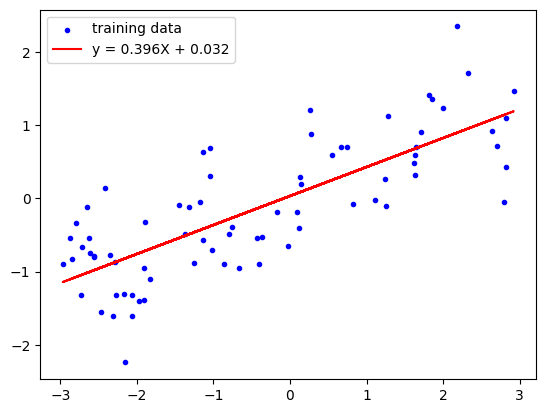

In [237]:
X_wave, y_wave = mglearn.datasets.make_wave()
X_wave_train, X_wave_test, y_wave_train, y_wave_test = train_test_split(X_wave, y_wave, random_state=0)

lr_wave = LinearRegression().fit(X_wave_train, y_wave_train)

plt.scatter(X_wave_train, y_wave_train, c = 'b', marker='.', label ='training data')
plt.plot(X_wave_train, lr_wave.predict(X_wave_train), c = 'r', label = 'y = {0}X + {1}'.format(round(lr_wave.coef_[0], 3), round(lr_wave.intercept_, 3)))
plt.legend()

print("Training set score: {:.2f}".format(lr_wave.score(X_wave_train, y_wave_train)))
print("Test set (generalization) score: {:.2f}".format(lr_wave.score(X_wave_test, y_wave_test)))

**2. Boston Housing dataset**

**OLS:** $y_i = \beta_0 + \beta_1 x_{1, i} + \beta_2 x_{2, i} + \cdots + \beta_{13} x_{13, i} + \epsilon_i$ for i = 1, 2, ..., 506.

- *CRIM*: per capita crime rate by town
- *ZN*: proportion of residential land zoned for lots over 25,000 sq.ft.
- *INDUS*: proportion of non-retail business acres per town.
- *CHAS*: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- *NOX*: nitric oxides concentration (parts per 10 million)
- *RM*: average number of rooms per dwelling
- *AGE*: proportion of owner-occupied units built prior to 1940
- *DIS*: weighted distances to five Boston employment centres
- *RAD*: index of accessibility to radial highways
- *TAX*: full-value property-tax rate per $10,000
- *PTRATIO*: pupil-teacher ratio by town
- *B*: $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- *LSTAT*: % lower status of the population
- *Outcome*: Median value of owner-occupied homes in $1000's



In [276]:
from fairlearn.datasets import fetch_boston
X_boston, y_boston = fetch_boston(return_X_y = True)

print(X_boston.dtypes) # check the data types of the columns
X_boston['CHAS'] = X_boston['CHAS'].astype(float)
X_boston['RAD'] = X_boston['RAD'].astype(float)

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object


C:\Users\pquyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fairlearn\datasets\_fetch_boston.py:135: DataFairnessWarning: You are about to use a dataset with known fairness issues.
  warnings.warn(DataFairnessWarning(msg))


The discrepancy between performance on the training set and the test set is a clear sign of overfitting

In [280]:
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, random_state=0)
lr_boston = LinearRegression().fit(X_boston_train, y_boston_train)

boston_betas = pd.DataFrame(list(X_boston), columns=['predictors'])
boston_betas = boston_betas.assign(lr_betas_hat = lr_boston.coef_)
display(boston_betas)

print("Training set score: {:.2f}".format(lr_boston.score(X_boston_train, y_boston_train)))
print("Test set (generalization) score: {:.2f}".format(lr_boston.score(X_boston_test, y_boston_test)))

,predictors,lr_betas_hat
0,CRIM,-0.117735
1,ZN,0.044017
2,INDUS,-0.005768
3,CHAS,2.393416
4,NOX,-15.589421
5,RM,3.768968
6,AGE,-0.007035
7,DIS,-1.434956
8,RAD,0.240081
9,TAX,-0.011297


Training set score: 0.77
Test set (generalization) score: 0.64


**Ridge regression:**

In [282]:
ridge_boston = Ridge().fit(X_boston_train, y_boston_train)

boston_betas = boston_betas.assign(ridge_betas_hat = ridge_boston.coef_)
display(boston_betas)

print("Training set score: {:.2f}".format(ridge_boston.score(X_boston_train, y_boston_train)))
print("Test set score: {:.2f}".format(ridge_boston.score(X_boston_test, y_boston_test)))

,predictors,lr_betas_hat,ridge_betas_hat
0,CRIM,-0.117735,-0.114786
1,ZN,0.044017,0.045418
2,INDUS,-0.005768,-0.035403
3,CHAS,2.393416,2.303291
4,NOX,-15.589421,-8.127445
5,RM,3.768968,3.806341
6,AGE,-0.007035,-0.014282
7,DIS,-1.434956,-1.336939
8,RAD,0.240081,0.216748
9,TAX,-0.011297,-0.011755


Training set score: 0.77
Test set score: 0.63


In [233]:
ridge10 = Ridge(alpha=10).fit(X_boston_train, y_boston_train)
print("Training set score: {:.2f}".format(ridge10.score(X_boston_train, y_boston_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_boston_test, y_boston_test)))

Training set score: 0.76
Test set score: 0.61
